2025-05-09 17:44:43.094900: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-09 17:44:43.098880: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-09 17:44:43.110084: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746787483.128223   49768 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746787483.133358   49768 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746787483.147776   49768 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Loading sample images from: /home/maidang/Repos/cat-classification/data/processed/train

--- Augmenting images for breed: burmese ---
  Displaying augmentations for: 0043.jpg


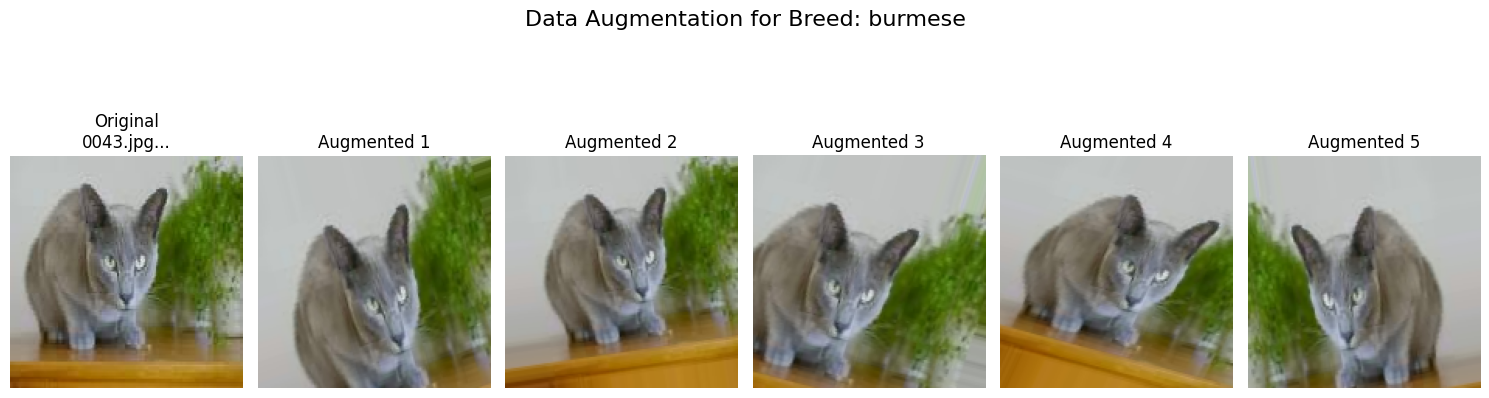


--- Augmenting images for breed: toyger ---
  Displaying augmentations for: 0108.jpg


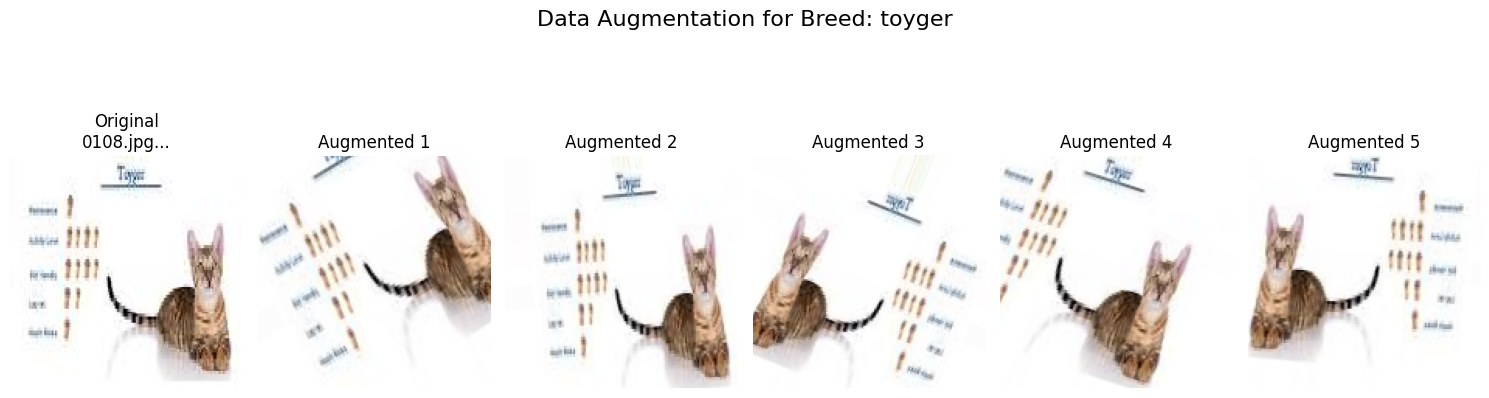


Data augmentation demonstration complete.


In [1]:
import os
import random
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# --- Constants ---
PROCESSED_TRAIN_DIR = os.path.expanduser('~/Repos/cat-classification/data/processed/train')
NUM_SAMPLE_BREEDS = 2  # Number of random breeds to pick for demonstration
NUM_IMAGES_PER_BREED = 1 # Number of sample images to augment from each selected breed
NUM_AUGMENTATIONS_TO_SHOW = 5 # Number of augmented versions to show for each original image
TARGET_SIZE = (150, 150) # Define a target size for consistency, can be adjusted

# --- ImageDataGenerator Configuration ---
# Define your augmentation strategies here
datagen = ImageDataGenerator(
    rotation_range=30,          # Randomly rotate images by up to 30 degrees
    width_shift_range=0.15,     # Randomly shift images horizontally by up to 15% of the width
    height_shift_range=0.15,    # Randomly shift images vertically by up to 15% of the height
    shear_range=0.15,           # Apply shear transformation
    zoom_range=0.15,            # Randomly zoom in on images
    horizontal_flip=True,       # Randomly flip images horizontally
    fill_mode='nearest'         # Strategy for filling in newly created pixels
)

def display_augmented_images(original_img_path, datagen, num_to_show, target_size):
    """
    Loads an original image, generates augmented versions, and displays them.
    """
    try:
        # Load the original image
        img = load_img(original_img_path, target_size=target_size)
        img_array = img_to_array(img)  # Convert to numpy array (height, width, channels)
        # Reshape to (1, height, width, channels) because datagen.flow() expects a batch of images
        img_array_batch = np.expand_dims(img_array, axis=0)

        plt.figure(figsize=(15, 5)) # Adjust figure size as needed

        # Display original image
        plt.subplot(1, num_to_show + 1, 1)
        plt.imshow(img)
        plt.title(f"Original\n{os.path.basename(original_img_path)[:20]}...")
        plt.axis('off')

        # Generate and display augmented images
        i = 0
        for batch in datagen.flow(img_array_batch, batch_size=1):
            augmented_img_array = batch[0] # Get the image from the batch
            # Convert back to PIL Image for display if needed, or use imshow directly with normalized data
            # For imshow, ensure pixel values are in the correct range [0,1] for float or [0,255] for int.
            # ImageDataGenerator typically outputs float32 arrays, possibly not in [0,255] range.
            # For simplicity, we'll cast to uint8 assuming it's scaled appropriately by datagen or handle normalization if needed.
            plt.subplot(1, num_to_show + 1, i + 2)
            plt.imshow(augmented_img_array.astype('uint8')) # Cast to uint8 for display
            plt.title(f"Augmented {i+1}")
            plt.axis('off')
            i += 1
            if i >= num_to_show:
                break # Break after generating enough augmented images
        
        breed_name = os.path.basename(os.path.dirname(original_img_path))
        plt.suptitle(f"Data Augmentation for Breed: {breed_name}", fontsize=16)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

    except FileNotFoundError:
        print(f"Error: Image not found at {original_img_path}")
    except Exception as e:
        print(f"An error occurred while processing {original_img_path}: {e}")


# --- Main Logic ---
if not os.path.exists(PROCESSED_TRAIN_DIR):
    print(f"Error: Processed training data directory not found at: {PROCESSED_TRAIN_DIR}")
    print("Please ensure you have run the data splitting notebook first.")
else:
    print(f"Loading sample images from: {PROCESSED_TRAIN_DIR}")
    
    breed_dirs = [d for d in os.listdir(PROCESSED_TRAIN_DIR) if os.path.isdir(os.path.join(PROCESSED_TRAIN_DIR, d))]
    
    if not breed_dirs:
        print(f"No breed subdirectories found in {PROCESSED_TRAIN_DIR}.")
    else:
        # Select a few random breeds for demonstration
        selected_breed_names = random.sample(breed_dirs, min(NUM_SAMPLE_BREEDS, len(breed_dirs)))
        
        for breed_name in selected_breed_names:
            breed_path = os.path.join(PROCESSED_TRAIN_DIR, breed_name)
            
            # Get all image files from the current breed directory
            image_files = []
            for ext in ('*.jpg', '*.jpeg', '*.png', '*.gif', '*.bmp'): # Common image extensions
                image_files.extend(glob.glob(os.path.join(breed_path, ext)))
                image_files.extend(glob.glob(os.path.join(breed_path, ext.upper()))) # For uppercase extensions
            
            image_files = sorted(list(set(image_files))) # Remove duplicates and sort

            if not image_files:
                print(f"  No images found for breed: {breed_name}")
                continue
            
            print(f"\n--- Augmenting images for breed: {breed_name} ---")
            # Select a few random images from this breed
            sample_image_paths = random.sample(image_files, min(NUM_IMAGES_PER_BREED, len(image_files)))
            
            for img_path in sample_image_paths:
                print(f"  Displaying augmentations for: {os.path.basename(img_path)}")
                display_augmented_images(img_path, datagen, NUM_AUGMENTATIONS_TO_SHOW, TARGET_SIZE)

print("\nData augmentation demonstration complete.")